# EDA and Preprocessing

In [26]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

expected_sales, the_number_of_shops = glob('expected_sales/*.csv'), glob('the_number_of_shops/*.csv')
expected_sales, the_number_of_shops

(['expected_sales\\expected_sales_2019.csv',
  'expected_sales\\expected_sales_2020.csv',
  'expected_sales\\expected_sales_2021.csv',
  'expected_sales\\expected_sales_2022.csv',
  'expected_sales\\expected_sales_2023.csv',
  'expected_sales\\expected_sales_2024.csv'],
 ['the_number_of_shops\\the_number_of_shops_2019.csv',
  'the_number_of_shops\\the_number_of_shops_2020.csv',
  'the_number_of_shops\\the_number_of_shops_2021.csv',
  'the_number_of_shops\\the_number_of_shops_2022.csv',
  'the_number_of_shops\\the_number_of_shops_2023.csv',
  'the_number_of_shops\\the_number_of_shops_2024.csv'])

In [27]:
df1 = pd.concat(pd.read_csv(i) for i in expected_sales)
df2 = pd.concat(pd.read_csv(i) for i in the_number_of_shops)
df1.shape, df2.shape

((512626, 55), (1831925, 14))

In [172]:
df = df1.merge(
    df2,
    how = 'inner',
    on = ['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'] 
)
print(df.shape)
df.head(5)

(512626, 65)


,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명,상권_코드_x,상권_코드_명,서비스_업종_코드_x,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_구분_코드_y,상권_코드_y,서비스_업종_코드_y,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,골목상권,3110001,이북5도청사,CS100001,한식음식점,400266580,10981,234853786,...,A,3110001,CS100001,11,11,0,0,9,1,0
1,20191,A,골목상권,3110001,이북5도청사,CS100008,분식전문점,52654409,4197,39028949,...,A,3110001,CS100008,3,3,0,0,0,0,0
2,20191,A,골목상권,3110001,이북5도청사,CS100009,호프-간이주점,6501771,239,3808940,...,A,3110001,CS100009,2,3,0,0,0,0,1
3,20191,A,골목상권,3110001,이북5도청사,CS200001,일반교습학원,28404163,112,28404163,...,A,3110001,CS200001,3,3,0,0,0,0,0
4,20191,A,골목상권,3110001,이북5도청사,CS300002,편의점,183559970,27266,126211816,...,A,3110001,CS300002,1,3,0,0,0,0,2


In [173]:
index_drop = df['점포_수'][df['점포_수'] == 0].index
index_drop

Index([    95,    133,    165,    216,    261,    270,    290,    326,    367,
          378,
       ...
       511466, 511498, 511606, 511755, 511770, 511821, 511937, 511991, 512249,
       512337],
      dtype='int64', length=6038)

In [ ]:
df.drop(index = index_drop, inplace = True)
#print(df.shape)
df.head()

KeyError: '[95, 133, 165, 216, 261, 270, 290, 326, 367, 378, 474, 500, 529, 608, 624, 658, 691, 712, 738, 768, 814, 831, 930, 974, 986, 995, 1031, 1046, 1113, 1139, 1150, 1166, 1186, 1287, 1365, 1465, 1491, 1528, 1533, 1685, 1700, 1722, 1869, 1952, 2189, 2244, 2306, 2405, 2489, 2519, 2564, 2685, 2726, 2755, 2866, 2888, 2914, 2982, 3004, 3033, 3067, 3097, 3108, 3153, 3217, 3240, 3274, 3291, 3348, 3393, 3436, 3448, 3575, 3731, 3760, 3841, 3854, 3894, 3961, 3983, 4061, 4082, 4119, 4133, 4158, 4250, 4267, 4375, 4393, 4453, 4458, 4485, 4489, 4737, 4817, 4840, 4852, 4856, 4876, 4885, 4988, 5071, 5119, 5228, 5297, 5298, 5372, 5396, 5551, 5700, 5709, 5745, 5748, 5844, 6047, 6066, 6322, 6341, 6352, 6396, 6410, 6415, 6480, 6482, 6490, 6612, 6671, 6731, 6751, 6909, 6952, 6984, 7068, 7100, 7102, 7114, 7187, 7195, 7227, 7262, 7326, 7332, 7404, 7427, 7498, 7543, 7555, 7606, 7722, 8076, 8112, 8231, 8429, 8520, 8642, 8688, 8721, 8854, 8928, 8974, 8984, 8987, 9153, 9253, 9519, 9534, 9585, 9607, 9649, 9711, 9724, 9744, 9908, 9981, 10192, 10259, 10952, 10999, 11085, 11123, 11268, 11329, 11380, 11393, 11406, 11449, 11474, 11502, 11523, 11653, 11752, 11941, 11942, 12285, 12379, 12471, 12514, 12614, 12752, 12854, 12964, 13028, 13149, 13253, 13385, 13474, 13825, 13873, 13880, 13887, 14684, 14742, 14806, 14862, 15348, 15349, 15443, 15554, 15555, 15618, 15731, 15765, 15766, 15811, 15876, 15893, 15965, 16062, 16077, 16114, 16616, 16619, 16644, 16768, 16864, 16897, 17122, 17140, 17274, 17720, 18111, 18335, 18460, 18529, 18595, 18627, 18825, 19422, 19455, 19504, 19553, 19561, 19583, 19620, 19661, 19674, 19772, 19798, 19828, 19909, 19925, 19962, 19996, 20008, 20023, 20049, 20082, 20127, 20143, 20244, 20292, 20306, 20315, 20355, 20371, 20439, 20466, 20492, 20614, 20697, 20797, 20803, 20825, 20861, 20866, 20941, 21023, 21038, 21059, 21206, 21294, 21589, 21650, 21750, 21866, 21914, 22037, 22076, 22236, 22262, 22325, 22346, 22377, 22410, 22440, 22451, 22499, 22564, 22587, 22623, 22641, 22699, 22792, 22804, 22933, 23089, 23119, 23202, 23217, 23258, 23326, 23348, 23418, 23426, 23447, 23485, 23499, 23525, 23616, 23633, 23744, 23762, 23822, 23827, 23856, 23860, 24116, 24199, 24220, 24232, 24235, 24257, 24267, 24371, 24402, 24452, 24615, 24685, 24686, 24759, 24783, 24938, 25079, 25096, 25131, 25134, 25231, 25301, 25302, 25436, 25718, 25738, 25749, 25757, 25809, 25814, 25837, 25880, 25882, 25889, 26008, 26063, 26123, 26145, 26306, 26347, 26380, 26464, 26496, 26508, 26578, 26586, 26618, 26653, 26717, 26723, 26798, 26820, 26890, 26938, 26951, 27122, 27455, 27483, 27522, 27840, 27932, 28057, 28106, 28139, 28278, 28356, 28404, 28414, 28587, 28688, 28955, 28970, 29022, 29044, 29087, 29151, 29185, 29350, 29426, 29633, 29700, 30399, 30447, 30535, 30572, 30720, 30781, 30835, 30848, 30861, 30905, 30930, 30959, 30981, 31109, 31396, 31397, 31522, 31746, 31841, 31933, 31976, 31977, 32075, 32216, 32316, 32426, 32490, 32613, 32719, 32852, 32943, 33299, 33350, 33356, 33365, 34160, 34218, 34337, 34826, 34922, 35035, 35100, 35248, 35293, 35360, 35450, 35550, 35565, 35602, 36106, 36109, 36134, 36259, 36393, 36620, 36636, 36770, 36854, 37226, 37622, 37846, 37973, 38042, 38110, 38127, 38143, 38343, 38946, 38978, 39025, 39074, 39083, 39107, 39144, 39184, 39198, 39298, 39322, 39352, 39432, 39448, 39485, 39518, 39530, 39545, 39572, 39606, 39650, 39665, 39767, 39816, 39830, 39839, 39857, 39879, 39895, 39963, 39990, 40016, 40148, 40227, 40327, 40333, 40353, 40391, 40396, 40471, 40551, 40567, 40588, 40610, 40671, 40738, 40830, 40975, 41129, 41193, 41290, 41407, 41579, 41618, 41784, 41798, 41810, 41878, 41900, 41929, 41963, 41994, 42005, 42050, 42114, 42138, 42176, 42195, 42254, 42346, 42358, 42492, 42651, 42683, 42772, 42789, 42832, 42899, 42922, 42993, 43002, 43025, 43065, 43079, 43104, 43159, 43198, 43306, 43327, 43345, 43406, 43411, 43442, 43446, 43705, 43787, 43808, 43820, 43824, 43846, 43856, 43963, 44041, 44204, 44273, 44274, 44349, 44372, 44530, 44599, 44661, 44695, 44729, 44732, 44829, 44895, 44896, 45031, 45317, 45335, 45346, 45354, 45405, 45410, 45432, 45478, 45603, 45660, 45722, 45744, 45813, 45907, 45949, 45982, 46066, 46099, 46191, 46224, 46259, 46326, 46332, 46409, 46430, 46500, 46562, 46590, 46738, 47012, 47106, 47146, 47180, 47470, 47560, 47685, 47735, 47768, 47902, 47979, 48026, 48035, 48207, 48309, 48573, 48588, 48640, 48661, 48704, 48767, 48800, 48965, 49038, 49220, 49251, 49319, 50023, 50073, 50162, 50200, 50348, 50408, 50460, 50474, 50487, 50531, 50557, 50587, 50609, 50743, 51035, 51036, 51160, 51481, 51620, 51720, 51844, 51861, 52081, 52145, 52374, 52506, 52597, 52949, 52951, 53001, 53006, 53015, 53992, 54488, 54568, 54584, 54698, 54765, 54913, 54957, 55111, 55210, 55225, 55261, 55780, 55805, 55930, 56065, 56312, 56442, 56526, 56904, 57302, 57529, 57657, 57727, 57798, 57815, 57831, 58032, 58505, 58639, 58671, 58684, 58719, 58768, 58776, 58800, 58835, 58876, 58888, 58985, 59010, 59041, 59129, 59148, 59186, 59222, 59233, 59248, 59275, 59308, 59352, 59368, 59469, 59517, 59531, 59540, 59560, 59582, 59600, 59667, 59693, 59720, 59846, 59960, 60032, 60036, 60056, 60093, 60098, 60175, 60256, 60271, 60292, 60312, 60373, 60439, 60535, 60678, 60715, 60832, 60964, 60995, 61112, 61282, 61325, 61492, 61506, 61518, 61539, 61587, 61611, 61640, 61673, 61716, 61760, 61826, 61850, 61889, 61908, 61968, 62063, 62075, 62211, 62369, 62402, 62491, 62508, 62551, 62619, 62643, 62716, 62726, 62750, 62788, 62803, 62827, 62885, 62925, 63035, 63058, 63077, 63140, 63145, 63174, 63178, 63446, 63526, 63547, 63559, 63563, 63585, 63704, 63784, 63948, 63971, 64018, 64019, 64028, 64120, 64162, 64279, 64348, 64413, 64445, 64481, 64484, 64584, 64652, 64653, 64791, 64804, 64833, 65086, 65106, 65117, 65127, 65179, 65184, 65207, 65253, 65388, 65448, 65511, 65520, 65536, 65603, 65698, 65771, 65809, 65860, 65885, 65893, 65987, 66056, 66120, 66126, 66202, 66223, 66296, 66358, 66537, 66907, 66946, 66981, 67274, 67371, 67553, 67587, 67722, 67799, 67844, 67853, 67856, 68030, 68132, 68401, 68416, 68467, 68488, 68531, 68594, 68626, 68793, 68801, 68869, 69053, 69085, 69153, 69782, 69863, 69913, 70002, 70040, 70163, 70195, 70256, 70268, 70309, 70323, 70336, 70380, 70407, 70438, 70461, 70593, 70889, 70890, 71015, 71574, 71695, 71711, 71927, 71990, 72209, 72220, 72352, 72445, 72802, 72804, 72856, 72861, 72870, 73859, 74363, 74443, 74459, 74571, 74641, 74834, 74993, 75093, 75108, 75145, 75644, 75664, 75691, 75815, 75954, 76345, 76430, 76811, 77089, 77215, 77448, 77521, 77577, 77646, 77717, 77751, 77953, 78431, 78569, 78614, 78648, 78700, 78724, 78760, 78799, 78806, 78812, 78908, 78933, 78965, 79050, 79068, 79106, 79150, 79166, 79192, 79225, 79269, 79285, 79382, 79390, 79440, 79453, 79462, 79464, 79478, 79499, 79517, 79584, 79612, 79640, 79748, 79769, 79960, 79965, 79986, 80023, 80027, 80099, 80179, 80196, 80217, 80237, 80294, 80363, 80459, 80605, 80642, 80760, 80894, 80925, 80926, 81043, 81063, 81222, 81263, 81428, 81442, 81455, 81476, 81525, 81548, 81577, 81611, 81655, 81700, 81765, 81826, 81845, 81905, 82000, 82013, 82150, 82197, 82309, 82340, 82429, 82446, 82491, 82558, 82564, 82582, 82653, 82687, 82726, 82742, 82767, 82866, 82971, 82992, 83011, 83079, 83110, 83113, 83371, 83474, 83486, 83490, 83512, 83632, 83837, 83865, 83888, 83936, 83937, 83946, 84035, 84076, 84260, 84323, 84355, 84392, 84395, 84495, 84563, 84699, 84711, 84740, 84999, 85019, 85030, 85039, 85091, 85096, 85120, 85164, 85297, 85355, 85419, 85428, 85444, 85511, 85609, 85686, 85725, 85802, 85810, 85848, 85907, 85977, 86044, 86051, 86129, 86150, 86224, 86286, 86464, 86523, 86833, 86872, 86904, 87096, 87202, 87223, 87296, 87476, 87508, 87642, 87721, 87770, 87779, 87782, 87954, 88009, 88058, 88322, 88335, 88386, 88408, 88452, 88517, 88551, 88715, 88723, 88791, 88973, 89005, 89073, 89700, 89831, 89920, 90112, 90172, 90184, 90226, 90240, 90253, 90298, 90359, 90381, 90512, 90807, 90808, 90934, 91497, 91638, 91860, 91926, 92147, 92158, 92292, 92385, 92744, 92746, 92799, 92806, 92815, 93792, 94292, 94388, 94503, 94573, 94766, 94925, 95023, 95038, 95076, 95130, 95568, 95587, 95613, 95736, 95870, 96126, 96259, 96284, 96345, 96718, 97121, 97236, 97355, 97425, 97481, 97552, 97625, 97659, 97861, 98340, 98477, 98520, 98555, 98609, 98634, 98669, 98709, 98721, 98819, 98844, 98875, 98962, 98979, 99016, 99075, 99102, 99135, 99178, 99196, 99290, 99297, 99347, 99361, 99370, 99373, 99390, 99412, 99431, 99501, 99529, 99684, 99877, 99883, 99897, 99904, 99944, 99948, 100024, 100107, 100124, 100146, 100168, 100229, 100262, 100302, 100404, 100556, 100593, 100609, 100711, 100874, 100990, 101171, 101217, 101283, 101388, 101403, 101417, 101438, 101486, 101509, 101538, 101572, 101618, 101663, 101730, 101812, 101872, 101969, 101982, 102121, 102169, 102282, 102316, 102326, 102403, 102421, 102467, 102536, 102560, 102631, 102665, 102704, 102721, 102746, 102844, 102953, 102975, 102994, 103065, 103095, 103098, 103105, 103332, 103364, 103467, 103479, 103483, 103506, 103844, 103875, 103898, 103946, 103947, 103956, 104048, 104093, 104280, 104346, 104380, 104405, 104419, 104524, 104595, 104736, 104748, 105041, 105062, 105073, 105082, 105137, 105142, 105166, 105345, 105404, 105454, 105469, 105479, 105495, 105562, 105660, 105737, 105776, 105851, 105859, 105897, 105955, 106025, 106089, 106097, 106173, 106195, 106268, 106333, 106518, 106579, 106888, 106931, 107156, 107264, 107284, 107357, 107539, 107571, 107660, 107711, 107792, 107839, 107849, 107852, 108028, 108399, 108464, 108486, 108530, 108597, 108630, 108791, 108798, 108870, 109056, 109087, 109158, 109792, 109924, 110015, 110209, 110270, 110282, 110324, 110338, 110395, 110458, 110474, 110482, 110615, 110912, 110913, 111040, 111612, 111755, 111834, 111975, 112040, 112258, 112269, 112496, 112861, 112864, 112915, 112921, 112931, 113911, 114409, 114505, 114621, 114690, 114888, 114926, 115144, 115160, 115198, 115253, 115708, 115727, 115753, 115875, 116011, 116408, 116870, 117275, 117391, 117511, 117580, 117637, 117708, 117780, 117815, 118018, 118019, 118495, 118635, 118682, 118770, 118778, 118795, 118871, 118883, 118978, 119004, 119035, 119121, 119139, 119179, 119240, 119267, 119300, 119342, 119360, 119456, 119463, 119513, 119525, 119535, 119538, 119554, 119593, 119664, 119692, 119842, 120037, 120043, 120057, 120063, 120101, 120105, 120268, 120285, 120309, 120330, 120393, 120468, 120565, 120721, 120760, 120878, 121047, 121048, 121129, 121166, 121346, 121392, 121461, 121618, 121666, 121690, 121720, 121752, 121795, 121841, 121908, 121989, 122050, 122159, 122297, 122453, 122487, 122497, 122573, 122637, 122697, 122710, 122734, 122805, 122840, 122879, 122895, 122920, 123018, 123131, 123154, 123174, 123247, 123278, 123281, 123288, 123549, 123650, 123662, 123666, 123690, 124033, 124065, 124088, 124138, 124150, 124245, 124283, 124474, 124541, 124566, 124575, 124614, 124719, 124790, 124935, 124946, 124960, 125246, 125267, 125278, 125326, 125344, 125373, 125392, 125557, 125618, 125669, 125685, 125695, 125713, 125784, 125886, 125928, 125964, 126002, 126077, 126085, 126124, 126184, 126253, 126320, 126409, 126431, 126502, 126566, 126752, 126815, 127132, 127173, 127396, 127495, 127530, 127606, 127634, 127791, 127823, 127916, 127962, 128043, 128092, 128103, 128106, 128287, 128657, 128723, 128745, 128790, 128859, 128873, 128892, 129052, 129059, 129127, 129316, 129347, 129418, 130053, 130186, 130187, 130279, 130424, 130473, 130533, 130545, 130589, 130603, 130660, 130705, 130724, 130748, 130879, 131178, 131179, 131308, 131880, 132019, 132098, 132239, 132304, 132523, 132534, 132762, 133120, 133123, 133174, 133179, 133189, 134585, 134684, 134785, 134902, 134969, 135166, 135204, 135234, 135421, 135475, 135530, 135993, 136012, 136040, 136162, 136299, 136651, 136700, 136963, 137165, 137581, 137696, 137814, 137868, 137887, 138017, 138089, 138126, 138327, 138805, 138947, 138992, 139085, 139109, 139183, 139195, 139291, 139315, 139347, 139438, 139454, 139495, 139556, 139584, 139620, 139662, 139679, 139778, 139785, 139835, 139847, 139857, 139878, 139918, 140020, 140170, 140331, 140365, 140371, 140390, 140394, 140428, 140432, 140597, 140615, 140638, 140661, 140726, 140799, 140899, 140928, 141054, 141094, 141205, 141373, 141374, 141457, 141494, 141680, 141722, 141789, 141948, 141998, 142022, 142051, 142084, 142126, 142174, 142242, 142322, 142383, 142473, 142496, 142789, 142822, 142832, 142974, 143047, 143071, 143182, 143221, 143237, 143261, 143357, 143465, 143488, 143509, 143582, 143615, 143622, 143767, 143883, 144000, 144004, 144026, 144405, 144428, 144477, 144490, 144577, 144814, 144883, 144908, 144917, 144958, 145061, 145131, 145288, 145302, 145453, 145586, 145607, 145682, 145688, 145713, 145732, 145902, 145964, 146016, 146033, 146043, 146059, 146129, 146232, 146255, 146280, 146318, 146356, 146434, 146442, 146481, 146541, 146609, 146678, 146720, 146769, 146792, 146862, 146928, 146931, 147120, 147185, 147514, 147556, 147778, 147876, 147912, 147987, 148017, 148111, 148178, 148212, 148306, 148359, 148439, 148485, 148495, 148498, 148678, 149051, 149118, 149140, 149185, 149194, 149270, 149289, 149449, 149456, 149710, 149742, 149811, 149834, 150450, 150584, 150677, 150822, 150871, 150932, 150944, 150987, 151059, 151081, 151105, 151123, 151147, 151281, 151374, 151579, 151580, 151705, 152500, 152643, 152644, 152708, 152929, 152941, 153170, 153537, 153588, 153593, 153603, 154996, 155093, 155191, 155374, 155573, 155611, 155642, 155830, 155885, 156397, 156416, 156569, 156707, 157061, 157111, 157220, 157477, 157583, 157893, 157998, 158111, 158284, 158302, 158338, 158429, 158502, 158541, 158741, 159221, 159373, 159426, 159507, 159540, 159565, 159652, 159659, 159665, 159722, 159773, 159797, 159828, 159932, 159953, 159994, 160012, 160049, 160065, 160094, 160132, 160177, 160197, 160231, 160307, 160316, 160321, 160350, 160375, 160389, 160401, 160424, 160476, 160591, 160719, 160761, 160952, 160960, 160989, 160997, 161019, 161021, 161061, 161065, 161241, 161261, 161285, 161311, 161379, 161463, 161579, 161611, 161623, 161703, 161764, 161921, 161931, 161934, 162074, 162086, 162123, 162137, 162227, 162274, 162294, 162336, 162465, 162492, 162497, 162506, 162557, 162637, 162817, 162874, 162905, 162941, 162973, 163022, 163079, 163154, 163239, 163308, 163360, 163406, 163430, 163566, 163658, 163772, 163803, 163816, 163934, 163974, 164055, 164081, 164202, 164248, 164265, 164291, 164337, 164396, 164438, 164441, 164484, 164530, 164557, 164666, 164699, 164706, 165001, 165039, 165130, 165137, 165142, 165170, 165587, 165606, 165613, 165665, 165676, 165692, 165779, 166033, 166107, 166132, 166146, 166187, 166364, 166388, 166389, 166516, 166573, 166588, 166745, 166769, 166886, 166907, 166989, 166994, 167000, 167026, 167048, 167227, 167296, 167356, 167390, 167406, 167485, 167589, 167641, 167657, 167683, 167729, 167788, 167813, 167820, 167861, 167931, 168016, 168096, 168145, 168195, 168224, 168307, 168338, 168384, 168388, 168604, 168678, 169080, 169316, 169430, 169475, 169494, 169555, 169591, 169703, 169770, 169808, 169916, 169970, 170059, 170118, 170129, 170132, 170136, 170335, 170372, 170575, 170728, 170796, 170819, 170864, 170873, 170951, 170972, 171138, 171146, 171412, 171446, 171539, 172158, 172192, 172293, 172326, 172423, 172577, 172630, 172693, 172704, 172749, 172824, 172870, 172890, 172913, 173057, 173161, 173185, 173370, 173506, 174268, 174500, 174501, 174566, 174698, 174786, 174800, 175039, 175303, 175421, 175476, 175484, 175495, 176133, 176409, 176953, 177053, 177152, 177274, 177344, 177547, 177588, 177620, 177621, 177807, 177821, 177878, 177879, 178415, 178436, 178594, 178749, 179131, 179185, 179291, 179308, 179535, 179694, 179731, 179899, 180026, 180140, 180252, 180265, 180462, 180481, 180558, 180622, 180702, 180741, 180793, 180953, 181460, 181613, 181669, 181748, 181782, 181808, 181895, 181903, 181909, 181965, 182016, 182039, 182069, 182174, 182193, 182195, 182235, 182253, 182308, 182337, 182375, 182421, 182443, 182557, 182566, 182571, 182601, 182625, 182639, 182651, 182674, 182726, 182843, 182966, 183013, 183096, 183203, 183211, 183239, 183247, 183269, 183271, 183307, 183311, 183486, 183507, 183531, 183557, 183565, 183628, 183710, 183830, 183864, 183876, 183924, 183956, 184083, 184181, 184337, 184349, 184387, 184491, 184537, 184557, 184601, 184727, 184755, 184761, 184770, 184824, 184900, 185081, 185168, 185175, 185239, 185288, 185347, 185424, 185510, 185631, 185677, 185701, 185840, 185915, 186051, 186082, 186096, 186210, 186249, 186330, 186339, 186359, 186367, 186482, 186529, 186546, 186573, 186603, 186619, 186679, 186723, 186726, 186740, 186755, 186771, 186818, 186846, 186954, 186989, 186996, 187299, 187336, 187437, 187442, 187469, 187893, 187911, 187918, 187968, 187971, 187982, 187999, 188089, 188417, 188442, 188457, 188500, 188675, 188700, 188701, 188829, 188885, 188900, 189017, 189061, 189086, 189206, 189226, 189309, 189315, 189321, 189348, 189369, 189555, 189619, 189626, 189688, 189720, 189815, 189920, 189973, 189989, 190015, 190061, 190119, 190145, 190152, 190196, 190264, 190352, 190432, 190478, 190525, 190553, 190636, 190667, 190715, 190926, 191002, 191394, 191633, 191746, 191776, 191789, 191809, 191869, 191907, 192018, 192086, 192124, 192236, 192288, 192380, 192438, 192449, 192452, 192456, 192516, 192655, 192681, 192691, 192894, 193046, 193114, 193137, 193180, 193190, 193270, 193291, 193454, 193461, 193726, 193761, 193857, 194478, 194512, 194612, 194645, 194743, 194870, 194894, 194895, 194949, 195012, 195023, 195068, 195143, 195189, 195208, 195231, 195376, 195480, 195503, 195822, 196586, 196823, 196890, 197023, 197113, 197128, 197360, 197621, 197739, 197791, 197798, 197809, 198444, 198724, 199474, 199594, 199667, 199877, 199918, 199950, 199951, 200134, 200149, 200206, 200207, 200751, 200772, 200932, 201462, 201516, 201619, 201636, 201859, 202017, 202054, 202222, 202348, 202467, 202579, 202592, 202791, 202884, 202950, 203031, 203067, 203119, 203281, 203785, 203935, 203992, 204073, 204097, 204105, 204130, 204173, 204218, 204230, 204288, 204338, 204361, 204392, 204495, 204513, 204515, 204555, 204571, 204578, 204625, 204653, 204691, 204738, 204760, 204871, 204880, 204885, 204914, 204939, 204953, 204965, 204988, 205041, 205157, 205283, 205327, 205408, 205512, 205520, 205548, 205556, 205577, 205580, 205617, 205621, 205819, 205841, 205866, 205874, 205935, 206018, 206138, 206171, 206184, 206232, 206264, 206394, 206490, 206552, 206642, 206688, 206727, 206792, 206837, 206856, 206899, 207027, 207053, 207059, 207068, 207122, 207200, 207377, 207455, 207465, 207472, 207538, 207586, 207644, 207808, 207930, 207976, 207998, 208139, 208212, 208341, 208374, 208388, 208542, 208621, 208628, 208649, 208657, 208774, 208822, 208839, 208865, 208896, 208912, 208973, 209016, 209019, 209034, 209049, 209065, 209141, 209251, 209280, 209285, 209292, 209593, 209631, 209732, 209737, 209764, 210185, 210204, 210211, 210260, 210275, 210291, 210378, 210710, 210735, 210749, 210792, 210891, 210968, 210994, 210995, 211118, 211173, 211188, 211306, 211349, 211374, 211492, 211512, 211535, 211601, 211606, 211612, 211631, 211639, 211661, 211847, 211909, 211915, 211973, 212097, 212206, 212260, 212302, 212347, 212407, 212433, 212440, 212483, 212551, 212595, 212637, 212714, 212763, 212809, 212836, 212915, 212943, 212959, 212990, 212991, 213199, 213273, 213657, 213736, 213901, 214012, 214042, 214074, 214134, 214170, 214277, 214344, 214379, 214546, 214634, 214694, 214705, 214708, 214712, 214910, 214935, 214945, 215147, 215300, 215365, 215388, 215431, 215441, 215519, 215540, 215702, 215709, 215972, 216005, 216097, 216719, 216753, 216857, 216989, 217118, 217142, 217143, 217198, 217270, 217314, 217388, 217435, 217454, 217477, 217622, 217724, 218068, 218825, 219061, 219126, 219262, 219354, 219368, 219601, 219863, 220029, 220035, 220047, 220681, 220955, 221018, 221701, 221823, 222104, 222145, 222177, 222178, 222362, 222376, 222434, 222998, 223156, 223686, 223737, 223838, 223853, 224082, 224242, 224280, 224447, 224573, 224693, 224807, 224820, 225017, 225106, 225170, 225252, 225289, 225347, 225510, 226017, 226140, 226170, 226225, 226305, 226330, 226338, 226362, 226406, 226450, 226463, 226518, 226571, 226582, 226597, 226627, 226731, 226749, 226751, 226793, 226808, 226815, 226863, 226866, 226893, 226935, 226983, 227119, 227129, 227134, 227163, 227187, 227201, 227213, 227237, 227287, 227405, 227534, 227579, 227661, 227763, 227771, 227798, 227805, 227829, 227832, 227869, 227873, 227962, 228051, 228072, 228094, 228120, 228128, 228192, 228274, 228392, 228424, 228437, 228487, 228647, 228742, 228751, 228803, 228895, 228941, 228980, 229042, 229086, 229105, 229146, 229278, 229306, 229312, 229321, 229373, 229456, 229545, 229635, 229712, 229721, 229728, 229792, 229839, 229899, 230064, 230172, 230188, 230233, 230255, 230396, 230469, 230633, 230646, 230767, 230803, 230881, 230889, 230910, 230918, 231032, 231082, 231100, 231124, 231167, 231228, 231274, 231277, 231292, 231308, 231324, 231396, 231402, 231509, 231510, 231542, 231546, 231553, 231808, 231855, 231989, 231996, 232002, 232029, 232321, 232474, 232481, 232530, 232534, 232561, 232651, 232954, 232991, 233014, 233030, 233073, 233170, 233251, 233275, 233276, 233457, 233472, 233590, 233635, 233661, 233779, 233800, 233884, 233890, 233896, 233913, 233923, 233944, 234128, 234191, 234197, 234258, 234384, 234491, 234545, 234587, 234631, 234689, 234716, 234723, 234768, 234837, 234882, 234922, 235000, 235048, 235095, 235121, 235198, 235228, 235244, 235274, 235275, 235484, 235557, 235582, 235610, 235956, 236037, 236204, 236316, 236344, 236377, 236438, 236474, 236582, 236652, 236690, 236863, 236954, 237011, 237022, 237025, 237225, 237260, 237446, 237463, 237614, 237680, 237703, 237746, 237756, 237836, 237857, 238023, 238030, 238292, 238325, 238420, 239037, 239071, 239175, 239309, 239437, 239462, 239516, 239590, 239638, 239712, 239760, 239780, 239803, 239951, 240054, 240397, 241125, 241163, 241403, 241468, 241603, 241692, 241707, 241939, 242310, 242364, 242370, 242381, 243355, 244019, 244037, 244435, 244476, 244508, 244509, 244525, 244694, 244708, 244767, 245339, 245498, 245796, 246030, 246081, 246157, 246183, 246199, 246429, 246590, 246629, 246792, 246920, 247038, 247154, 247168, 247363, 247454, 247519, 247604, 247642, 247697, 247862, 248371, 248527, 248584, 248660, 248685, 248692, 248715, 248758, 248803, 248816, 248876, 248924, 248934, 248949, 248979, 249082, 249102, 249104, 249145, 249160, 249167, 249186, 249216, 249219, 249245, 249286, 249335, 249467, 249476, 249480, 249508, 249532, 249546, 249559, 249561, 249582, 249591, 249633, 249752, 249876, 249921, 250000, 250101, 250110, 250136, 250143, 250164, 250205, 250209, 250385, 250407, 250430, 250455, 250463, 250527, 250613, 250731, 250764, 250777, 250987, 251087, 251096, 251148, 251283, 251320, 251381, 251425, 251445, 251482, 251613, 251645, 251654, 251706, 251784, 251920, 251966, 252046, 252055, 252062, 252126, 252175, 252232, 252393, 252498, 252516, 252562, 252583, 252631, 252726, 252799, 252974, 253096, 253131, 253210, 253217, 253238, 253246, 253362, 253411, 253429, 253455, 253498, 253561, 253609, 253612, 253627, 253643, 253660, 253674, 253735, 253742, 253852, 253885, 253889, 253897, 254160, 254207, 254342, 254348, 254353, 254380, 254606, 254615, 254666, 254822, 254870, 254874, 254900, 254965, 254988, 255040, 255284, 255304, 255320, 255344, 255358, 255398, 255498, 255599, 255764, 255776, 255791, 255906, 255952, 255979, 256099, 256121, 256206, 256213, 256220, 256238, 256248, 256269, 256453, 256517, 256523, 256583, 256708, 256814, 256869, 256911, 256953, 257010, 257037, 257044, 257089, 257157, 257201, 257370, 257416, 257443, 257519, 257550, 257597, 257598, 257805, 257873, 257901, 257930, 258282, 258361, 258638, 258667, 258760, 258798, 258905, 258974, 259137, 259176, 259268, 259323, 259334, 259337, 259445, 259534, 259569, 259752, 259768, 259915, 259979, 260002, 260045, 260054, 260130, 260312, 260318, 260615, 260711, 261120, 261317, 261350, 261454, 261586, 261715, 261741, 261795, 261870, 261918, 261993, 262041, 262062, 262088, 262235, 262336, 262339, 262677, 263171, 263405, 263445, 263678, 263963, 263977, 264212, 264580, 264633, 264640, 264651, 265630, 266298, 266718, 266759, 266792, 266808, 266973, 267612, 267769, 268284, 268299, 268349, 268450, 268467, 268691, 268850, 268888, 269298, 269428, 269624, 269718, 269781, 269864, 269901, 269955, 270118, 270226, 270626, 270781, 270837, 270913, 270939, 270946, 270969, 271012, 271057, 271133, 271190, 271205, 271336, 271359, 271402, 271417, 271424, 271443, 271473, 271501, 271543, 271594, 271733, 271742, 271746, 271774, 271800, 271815, 271826, 271849, 271857, 271901, 272020, 272148, 272193, 272275, 272413, 272420, 272443, 272485, 272489, 272666, 272688, 272712, 272741, 272805, 272888, 273005, 273039, 273052, 273258, 273363, 273413, 273545, 273583, 273645, 273686, 273706, 273743, 273868, 273901, 273910, 273964, 274046, 274094, 274181, 274230, 274309, 274318, 274389, 274438, 274490, 274651, 274757, 274774, 274819, 274841, 274979, 275050, 275092, 275225, 275345, 275381, 275464, 275473, 275494, 275502, 275618, 275665, 275684, 275702, 275711, 275818, 275864, 275882, 275900, 275917, 275928, 275990, 275997, 276107, 276145, 276153, 276412, 276459, 276592, 276598, 276603, 276630, 276745, 276796, 276856, 276909, 277070, 277117, 277120, 277121, 277141, 277150, 277215, 277240, 277294, 277537, 277559, 277576, 277602, 277617, 277629, 277659, 277863, 278028, 278043, 278059, 278172, 278220, 278248, 278373, 278394, 278477, 278484, 278492, 278509, 278519, 278539, 278724, 278788, 278794, 278852, 278978, 279087, 279143, 279184, 279225, 279283, 279310, 279317, 279365, 279433, 279478, 279645, 279694, 279720, 279800, 279831, 279876, 280080, 280148, 280178, 280194, 280208, 280551, 280630, 280903, 280932, 281022, 281058, 281168, 281234, 281244, 281272, 281400, 281440, 281528, 281580, 281592, 281595, 281615, 281707, 281798, 281833, 282020, 282036, 282184, 282249, 282272, 282314, 282323, 282395, 282580, 282586, 282885, 282977, 283609, 283714, 283845, 283972, 283997, 283998, 284052, 284128, 284175, 284249, 284322, 284347, 284493, 284598, 284601, 284940, 285433, 285661, 285700, 285932, 286220, 286234, 286470, 286835, 286888, 286895, 286906, 287887, 288292, 288555, 288970, 289010, 289043, 289059, 289548, 289862, 290021, 290532, 290547, 290598, 290701, 290717, 290943, 291100, 291136, 291552, 291681, 291705, 291874, 291969, 292036, 292118, 292157, 292212, 292377, 292481, 292876, 293025, 293078, 293124, 293154, 293178, 293185, 293208, 293251, 293297, 293367, 293441, 293571, 293594, 293635, 293657, 293675, 293705, 293734, 293776, 293826, 293958, 293967, 293971, 294000, 294024, 294039, 294050, 294072, 294080, 294124, 294243, 294368, 294413, 294461, 294608, 294635, 294642, 294665, 294707, 294711, 294890, 294912, 294937, 294969, 295035, 295118, 295234, 295269, 295282, 295495, 295598, 295647, 295783, 295820, 295880, 295921, 295941, 295980, 296105, 296137, 296195, 296236, 296276, 296321, 296406, 296454, 296533, 296542, 296608, 296655, 296708, 296825, 296870, 296976, 296994, 297041, 297063, 297198, 297269, 297443, 297560, 297675, 297684, 297707, 297828, 297873, 297911, 297919, 298022, 298070, 298087, 298106, 298122, 298134, 298139, 298191, 298198, 298305, 298341, 298348, 298603, 298648, 298783, 298788, 298813, 298834, 298929, 298982, 299042, 299250, 299298, 299301, 299302, 299329, 299393, 299416, 299470, 299709, 299730, 299745, 299770, 299784, 299796, 299825, 300028, 300192, 300207, 300222, 300336, 300384, 300412, 300536, 300557, 300640, 300655, 300672, 300681, 300702, 300890, 300956, 300962, 301021, 301146, 301251, 301307, 301348, 301389, 301449, 301476, 301483, 301531, 301596, 301641, 301809, 301859, 301884, 301961, 301993, 302038, 302311, 302340, 302356, 302370, 302709, 302710, 302790, 303063, 303090, 303178, 303214, 303318, 303383, 303394, 303422, 303548, 303585, 303671, 303722, 303734, 303737, 303755, 303846, 303936, 303972, 304159, 304175, 304321, 304385, 304408, 304450, 304459, 304533, 304719, 304726, 305025, 305116, 305746, 305850, 305982, 306111, 306135, 306191, 306265, 306312, 306385, 306457, 306482, 306632, 306735, 306738, 307081, 307570, 307799, 307819, 307837, 308065, 308353, 308364, 308598, 308966, 309018, 309023, 309034, 310003, 310405, 310669, 311086, 311124, 311157, 311406, 311407, 311661, 311973, 312132, 312648, 312664, 312717, 312822, 313059, 313215, 313251, 313663, 313790, 313813, 313985, 314079, 314148, 314272, 314328, 314491, 314593, 314687, 314989, 315141, 315193, 315268, 315293, 315300, 315323, 315365, 315411, 315480, 315551, 315632, 315651, 315686, 315709, 315749, 315772, 315790, 315821, 315851, 315895, 315943, 316070, 316079, 316083, 316112, 316136, 316151, 316162, 316184, 316233, 316258, 316321, 316351, 316478, 316521, 316569, 316626, 316714, 316743, 316750, 316773, 316815, 316819, 317001, 317023, 317048, 317078, 317146, 317229, 317349, 317385, 317399, 317727, 317775, 317917, 317953, 318015, 318055, 318112, 318235, 318268, 318332, 318373, 318415, 318461, 318550, 318596, 318674, 318749, 318795, 318851, 319012, 319119, 319135, 319181, 319203, 319338, 319411, 319453, 319587, 319704, 319815, 319823, 319846, 319966, 320012, 320049, 320057, 320162, 320213, 320231, 320249, 320278, 320282, 320336, 320343, 320452, 320489, 320496, 320752, 320935, 320940, 320962, 320982, 321080, 321134, 321412, 321459, 321462, 321463, 321491, 321555, 321578, 321632, 321873, 321895, 321911, 321938, 321950, 321961, 321990, 322168, 322362, 322377, 322378, 322393, 322507, 322557, 322586, 322659, 322708, 322730, 322741, 322813, 322827, 322844, 322854, 322874, 323000, 323066, 323130, 323136, 323197, 323323, 323431, 323488, 323529, 323570, 323630, 323657, 323665, 323709, 323778, 323802, 323823, 323954, 324037, 324060, 324170, 324185, 324215, 324494, 324524, 324539, 324553, 324890, 324891, 324967, 325087, 325241, 325269, 325361, 325396, 325505, 325573, 325585, 325612, 325737, 325776, 325865, 325915, 325926, 325929, 325947, 326037, 326127, 326164, 326351, 326367, 326516, 326581, 326604, 326644, 326653, 326731, 326919, 326927, 327223, 327317, 327958, 328046, 328061, 328192, 328321, 328346, 328403, 328477, 328525, 328667, 328692, 328838, 328941, 328944, 329284, 329775, 330007, 330028, 330048, 330273, 330560, 330571, 330804, 331179, 331233, 331238, 331250, 332223, 332628, 332888, 333303, 333340, 333372, 333622, 333623, 333700, 333874, 334184, 334344, 334852, 334868, 334921, 335028, 335268, 335427, 335463, 335875, 336003, 336026, 336138, 336201, 336299, 336368, 336491, 336544, 336704, 336808, 336904, 337310, 337353, 337405, 337505, 337512, 337534, 337578, 337623, 337694, 337769, 337847, 337864, 337902, 337924, 337963, 337988, 338005, 338037, 338066, 338109, 338157, 338285, 338293, 338297, 338325, 338351, 338366, 338377, 338398, 338448, 338475, 338514, 338535, 338566, 338691, 338732, 338781, 338841, 338931, 338956, 338964, 338987, 339030, 339034, 339221, 339242, 339266, 339294, 339441, 339556, 339588, 339602, 339923, 339971, 340111, 340124, 340153, 340217, 340259, 340321, 340444, 340472, 340478, 340543, 340583, 340623, 340665, 340751, 340795, 340948, 340992, 341048, 341208, 341314, 341330, 341336, 341377, 341399, 341410, 341474, 341540, 341613, 341789, 341906, 342020, 342029, 342052, 342175, 342219, 342256, 342265, 342368, 342420, 342438, 342457, 342486, 342490, 342543, 342657, 342694, 342702, 342776, 342960, 343141, 343146, 343170, 343190, 343281, 343336, 343611, 343661, 343662, 343757, 343780, 343832, 344067, 344089, 344106, 344132, 344144, 344155, 344184, 344362, 344364, 344554, 344568, 344569, 344573, 344584, 344699, 344748, 344777, 344854, 344900, 344921, 344932, 345020, 345037, 345046, 345065, 345190, 345258, 345322, 345328, 345507, 345615, 345669, 345708, 345747, 345807, 345833, 345840, 345884, 345948, 345993, 346208, 346230, 346268, 346354, 346384, 346659, 346688, 346702, 346715, 347050, 347051, 347127, 347247, 347399, 347426, 347438, 347517, 347551, 347658, 347727, 347738, 347766, 347839, 347893, 347934, 348020, 348062, 348070, 348081, 348084, 348102, 348195, 348286, 348322, 348506, 348522, 348669, 348735, 348758, 348798, 348807, 348882, 349075, 349083, 349225, 349372, 349467, 349962, 350103, 350189, 350204, 350335, 350463, 350489, 350546, 350619, 350646, 350668, 350812, 350838, 350985, 350986, 351086, 351089, 351427, 351728, 351914, 352142, 352162, 352181, 352399, 352684, 352696, 352931, 353299, 353351, 353355, 354333, 354734, 354993, 355408, 355445, 355476, 355729, 355730, 355807, 355983, 356292, 356454, 356887, 356967, 356983, 357038, 357145, 357382, 357544, 357580, 357993, 358107, 358120, 358142, 358251, 358313, 358408, 358423, 358476, 358596, 358618, 358649, 358812, 358915, 359008, 359417, 359514, 359569, 359627, 359691, 359735, 359805, 359878, 359957, 359976, 360014, 360034, 360101, 360120, 360153, 360225, 360291, 360395, 360403, 360407, 360435, 360460, 360474, 360485, 360505, 360556, 360582, 360623, 360644, 360673, 360803, 360844, 360893, 360953, 361042, 361069, 361097, 361140, 361144, 361148, 361328, 361348, 361374, 361401, 361548, 361667, 361698, 361713, 362035, 362041, 362085, 362111, 362224, 362264, 362328, 362336, 362372, 362434, 362560, 362657, 362696, 362737, 362781, 362868, 362917, 363113, 363166, 363243, 363330, 363396, 363435, 363451, 363457, 363499, 363520, 363529, 363657, 363728, 363899, 364011, 364119, 364126, 364149, 364254, 364272, 364316, 364352, 364463, 364513, 364531, 364552, 364579, 364584, 364636, 364748, 364787, 364794, 364864, 365229, 365233, 365256, 365274, 365375, 365424, 365757, 365852, 365927, 366166, 366188, 366203, 366229, 366242, 366254, 366283, 366440, 366462, 366649, 366664, 366665, 366669, 366680, 366791, 366839, 366867, 366906, 366944, 366990, 367012, 367125, 367135, 367155, 367281, 367345, 367410, 367416, 367496, 367597, 367706, 367761, 367799, 367839, 367900, 367925, 367932, 367975, 368040, 368085, 368298, 368323, 368363, 368454, 368484, 368759, 368789, 368803, 368816, 369149, 369150, 369180, 369343, 369518, 369531, 369608, 369642, 369754, 369821, 369835, 369863, 369939, 369990, 370030, 370156, 370164, 370174, 370177, 370195, 370288, 370381, 370418, 370605, 370621, 370770, 370836, 370859, 370900, 370910, 370988, 371177, 371185, 371329, 371477, 371571, 372067, 372209, 372300, 372315, 372449, 372577, 372602, 372659, 372733, 372759, 372780, 372804, 372836, 372922, 372948, 373098, 373198, 373201, 373835, 374029, 374257, 374277, 374296, 374454, 374516, 374799, 374811, 375042, 375405, 375408, 375457, 375462, 375915, 376436, 376835, 377096, 377511, 377547, 377548, 377828, 377829, 377905, 378077, 378387, 378462, 378550, 378966, 379060, 379131, 379236, 379468, 379663, 380076, 380192, 380206, 380228, 380336, 380397, 380493, 380508, 380562, 380680, 380733, 380892, 380996, 381088, 381395, 381501, 381595, 381709, 381776, 381821, 381889, 381963, 382042, 382061, 382097, 382121, 382186, 382206, 382238, 382312, 382379, 382483, 382491, 382495, 382523, 382547, 382561, 382592, 382644, 382670, 382711, 382732, 382761, 382887, 382928, 382976, 383037, 383126, 383151, 383180, 383224, 383228, 383410, 383430, 383456, 383484, 383627, 383742, 383773, 383783, 383788, 383872, 384114, 384120, 384163, 384273, 384304, 384342, 384393, 384405, 384412, 384446, 384506, 384628, 384722, 384761, 384803, 384847, 384934, 384979, 385077, 385182, 385232, 385391, 385459, 385499, 385515, 385522, 385563, 385584, 385595, 385725, 385974, 386088, 386196, 386226, 386333, 386351, 386394, 386430, 386538, 386586, 386605, 386625, 386653, 386708, 386823, 386859, 386866, 387302, 387329, 387347, 387445, 387493, 387823, 387919, 387993, 388229, 388250, 388266, 388291, 388304, 388315, 388344, 388500, 388522, 388710, 388724, 388725, 388729, 388740, 388852, 388900, 388928, 388968, 389007, 389052, 389074, 389186, 389195, 389214, 389338, 389402, 389466, 389472, 389551, 389650, 389755, 389810, 389848, 389889, 389950, 389975, 389983, 390025, 390092, 390137, 390347, 390372, 390412, 390529, 390800, 390845, 390858, 391195, 391196, 391226, 391387, 391561, 391575, 391654, 391688, 391800, 391867, 391879, 391907, 391982, 392036, 392075, 392204, 392212, 392222, 392225, 392242, 392334, 392425, 392461, 392646, 392811, 392876, 392899, 392940, 392949, 393026, 393214, 393221, 393366, 393513, 393603, 394101, 394242, 394344, 394381, 394478, 394608, 394689, 394761, 394787, 394834, 394867, 394955, 394981, 395129, 395231, 395234, 395872, 396065, 396292, 396311, 396329, 396486, 396548, 396834, 397079, 397443, 397446, 397496, 397500, 397622, 397665, 397948, 398157, 398470, 398866, 399125, 399537, 399573, 399574, 399854, 399855, 399932, 400105, 400414, 400490, 400577, 400993, 401087, 401156, 401263, 401497, 401692, 401880, 402214, 402228, 402250, 402357, 402416, 402509, 402524, 402576, 402695, 402751, 403016, 403108, 403412, 403519, 403613, 403724, 403746, 403836, 403903, 403976, 404052, 404063, 404070, 404105, 404128, 404216, 404246, 404320, 404384, 404489, 404497, 404501, 404526, 404550, 404565, 404596, 404647, 404698, 404717, 404738, 404766, 404934, 404980, 405039, 405124, 405151, 405179, 405182, 405223, 405227, 405412, 405430, 405456, 405483, 405627, 405741, 405771, 405865, 406109, 406115, 406157, 406184, 406297, 406336, 406386, 406399, 406406, 406442, 406502, 406626, 406723, 406763, 406801, 406844, 406932, 407003, 407075, 407179, 407230, 407392, 407501, 407517, 407525, 407567, 407589, 407728, 407970, 408082, 408193, 408221, 408325, 408345, 408361, 408389, 408426, 408531, 408578, 408597, 408617, 408644, 408699, 408816, 408855, 408862, 408933, 409075, 409293, 409322, 409341, 409442, 409490, 409821, 409915, 409935, 409989, 410232, 410253, 410269, 410307, 410320, 410351, 410504, 410529, 410715, 410729, 410730, 410745, 410858, 410906, 410934, 410975, 411012, 411058, 411081, 411192, 411200, 411220, 411349, 411413, 411420, 411483, 411561, 411571, 411664, 411832, 411871, 411912, 411973, 411998, 412006, 412048, 412115, 412160, 412200, 412372, 412397, 412437, 412552, 412821, 412861, 412874, 413208, 413209, 413239, 413572, 413585, 413662, 413698, 413808, 413876, 413886, 413914, 413989, 414000, 414043, 414082, 414210, 414217, 414226, 414228, 414245, 414338, 414429, 414467, 414549, 414655, 414822, 414888, 414912, 414954, 414963, 415042, 415232, 415384, 415501, 415532, 415600, 415621, 416092, 416117, 416255, 416357, 416394, 416491, 416621, 416704, 416778, 416804, 416883, 416972, 416998, 417144, 417247, 417250, 417888, 417890, 418313, 418332, 418352, 418510, 418573, 418861, 419106, 419468, 419471, 419522, 419527, 419654, 419699, 419983, 420502, 420895, 421147, 421560, 421595, 421882, 421883, 421959, 422437, 422514, 422601, 423026, 423118, 423187, 423292, 423531, 423727, 424250, 424262, 424284, 424390, 424543, 424558, 424609, 424730, 424789, 425053, 425145, 425451, 425556, 425652, 425766, 425787, 425879, 425946, 426017, 426093, 426109, 426141, 426164, 426251, 426352, 426420, 426521, 426529, 426533, 426559, 426589, 426602, 426611, 426632, 426683, 426731, 426749, 426770, 426797, 426960, 427064, 427148, 427173, 427202, 427205, 427245, 427249, 427430, 427449, 427474, 427501, 427646, 427762, 427794, 427890, 428134, 428141, 428172, 428186, 428324, 428362, 428412, 428430, 428463, 428526, 428546, 428644, 428648, 428741, 428780, 428818, 428858, 428946, 429016, 429087, 429170, 429191, 429244, 429403, 429512, 429519, 429530, 429538, 429582, 429604, 429745, 429834, 429985, 430067, 430098, 430208, 430236, 430338, 430356, 430400, 430436, 430543, 430590, 430609, 430626, 430653, 430707, 430825, 430861, 430868, 430934, 431076, 431292, 431324, 431342, 431444, 431490, 431816, 431909, 431929, 431982, 432200, 432219, 432240, 432271, 432292, 432304, 432332, 432484, 432705, 432706, 432721, 432842, 432889, 432916, 432956, 432992, 433037, 433060, 433170, 433179, 433199, 433389, 433461, 433520, 433539, 433550, 433642, 433805, 433842, 433872, 433940, 433966, 433972, 434014, 434079, 434124, 434333, 434359, 434397, 434512, 434781, 434819, 434833, 434848, 435170, 435171, 435202, 435534, 435547, 435627, 435663, 435733, 435774, 435842, 435852, 435880, 435956, 435966, 436008, 436046, 436059, 436173, 436182, 436191, 436193, 436207, 436299, 436388, 436425, 436504, 436608, 436772, 436838, 436861, 436901, 436909, 436988, 437178, 437332, 437448, 437480, 437550, 437571, 438035, 438060, 438075, 438198, 438239, 438300, 438337, 438435, 438565, 438647, 438720, 438746, 438826, 438913, 438939, 439089, 439189, 439192, 439834, 440250, 440269, 440289, 440450, 440511, 440803, 441047, 441412, 441415, 441416, 441469, 441473, 441596, 441921, 442433, 442828, 443080, 443490, 443524, 443811, 443812, 444176, 444373, 444451, 444539, 445048, 445116, 445218, 445457, 445655, 446176, 446188, 446209, 446309, 446458, 446473, 446523, 446645, 446699, 446963, 447056, 447361, 447467, 447510, 447563, 447676, 447698, 447788, 447855, 447925, 448001, 448014, 448043, 448066, 448151, 448248, 448313, 448419, 448428, 448458, 448486, 448499, 448529, 448577, 448626, 448644, 448666, 448695, 448756, 448769, 448829, 448863, 448928, 448969, 448995, 449054, 449079, 449107, 449110, 449147, 449151, 449333, 449351, 449375, 449402, 449548, 449660, 449690, 449782, 450023, 450031, 450060, 450088, 450113, 450210, 450247, 450316, 450352, 450413, 450434, 450532, 450537, 450546, 450566, 450632, 450669, 450708, 450749, 450836, 450904, 451061, 451082, 451133, 451206, 451260, 451290, 451400, 451408, 451419, 451427, 451491, 451634, 451724, 451874, 451985, 452097, 452099, 452126, 452227, 452245, 452289, 452324, 452341, 452435, 452481, 452501, 452505, 452521, 452550, 452605, 452720, 452755, 452762, 452832, 452979, 453183, 453195, 453226, 453342, 453387, 453715, 453808, 453828, 453881, 454110, 454130, 454146, 454183, 454196, 454225, 454371, 454597, 454612, 454732, 454780, 454807, 454849, 454885, 454929, 454950, 455061, 455070, 455090, 455097, 455282, 455355, 455413, 455414, 455434, 455435, 455445, 455536, 455702, 455739, 455769, 455835, 455856, 455863, 455869, 455913, 455976, 456021, 456148, 456231, 456257, 456294, 456411, 456412, 456684, 456724, 456966, 457069, 457070, 457139, 457236, 457264, 457373, 457435, 457449, 457528, 457566, 457635, 457675, 457739, 457750, 457778, 457852, 457862, 457903, 457941, 457956, 458073, 458080, 458090, 458092, 458107, 458201, 458289, 458324, 458402, 458509, 458675, 458740, 458763, 458805, 458813, 458891, 459082, 459236, 459352, 459384, 459455, 459475, 459946, 459986, 460110, 460149, 460210, 460247, 460344, 460477, 460558, 460630, 460656, 460734, 460822, 460847, 460993, 461092, 461095, 461736, 462154, 462173, 462194, 462352, 462416, 462485, 462655, 462946, 463311, 463365, 463369, 463493, 463815, 464326, 464644, 464723, 464976, 465389, 465711, 465712, 466077, 466269, 466347, 466436, 466947, 467015, 467118, 467548, 467589, 468066, 468078, 468099, 468203, 468351, 468366, 468418, 468541, 468597, 468856, 468946, 469248, 469350, 469389, 469440, 469545, 469567, 469661, 469728, 469798, 469872, 469884, 469913, 469934, 470022, 470118, 470184, 470286, 470295, 470328, 470355, 470394, 470439, 470487, 470505, 470525, 470554, 470617, 470629, 470720, 470785, 470826, 470853, 470911, 470963, 470966, 471007, 471012, 471194, 471212, 471234, 471261, 471262, 471406, 471518, 471548, 471637, 471881, 471889, 471917, 471932, 471944, 471967, 472068, 472081, 472106, 472173, 472209, 472271, 472292, 472390, 472395, 472404, 472424, 472492, 472530, 472569, 472610, 472696, 472763, 472919, 472941, 472992, 473066, 473121, 473262, 473270, 473281, 473288, 473351, 473491, 473581, 473731, 473844, 473951, 473953, 473979, 474078, 474096, 474139, 474174, 474190, 474284, 474331, 474349, 474353, 474369, 474398, 474455, 474567, 474603, 474610, 474679, 474822, 475023, 475035, 475065, 475182, 475226, 475551, 475641, 475661, 475716, 475948, 475967, 475983, 476020, 476031, 476060, 476177, 476209, 476430, 476445, 476564, 476611, 476639, 476681, 476717, 476759, 476781, 476890, 476899, 477108, 477182, 477241, 477262, 477263, 477274, 477363, 477532, 477569, 477601, 477669, 477688, 477695, 477701, 477747, 477811, 477856, 477981, 478066, 478092, 478129, 478244, 478245, 478507, 478548, 478794, 478891, 478892, 478962, 479056, 479083, 479192, 479244, 479255, 479268, 479347, 479382, 479449, 479488, 479551, 479562, 479590, 479671, 479713, 479750, 479764, 479880, 479887, 479897, 479899, 479906, 479914, 480006, 480093, 480127, 480206, 480311, 480479, 480547, 480570, 480610, 480618, 480694, 480715, 480883, 481038, 481154, 481185, 481254, 481272, 481738, 481903, 481943, 482003, 482039, 482136, 482270, 482352, 482424, 482450, 482530, 482617, 482642, 482789, 482888, 482891, 483353, 483527, 483965, 483984, 484142, 484205, 484275, 484448, 484740, 485098, 485151, 485155, 485278, 485602, 486107, 486428, 486506, 486576, 486756, 486962, 487162, 487478, 487479, 487839, 488033, 488111, 488199, 488700, 488765, 488866, 489286, 489327, 489798, 489830, 489932, 490080, 490095, 490147, 490269, 490325, 490580, 490670, 490966, 491068, 491109, 491160, 491265, 491287, 491333, 491379, 491446, 491517, 491590, 491602, 491631, 491652, 491716, 491740, 491837, 491900, 492003, 492012, 492045, 492069, 492111, 492154, 492203, 492221, 492241, 492270, 492332, 492344, 492438, 492541, 492553, 492569, 492629, 492680, 492683, 492723, 492728, 492908, 492928, 492949, 492975, 492976, 493120, 493230, 493261, 493351, 493593, 493601, 493630, 493645, 493657, 493681, 493782, 493795, 493820, 493888, 493921, 493983, 494003, 494101, 494105, 494114, 494132, 494198, 494199, 494275, 494314, 494388, 494466, 494621, 494642, 494696, 494771, 494827, 494961, 494969, 494980, 494987, 495050, 495189, 495274, 495313, 495422, 495534, 495642, 495644, 495671, 495773, 495790, 495833, 495869, 495977, 496023, 496042, 496046, 496061, 496089, 496147, 496258, 496293, 496300, 496364, 496508, 496711, 496724, 496754, 496838, 496915, 497237, 497328, 497348, 497403, 497635, 497669, 497706, 497720, 497750, 497864, 498118, 498134, 498253, 498298, 498326, 498365, 498402, 498445, 498466, 498574, 498583, 498794, 498864, 498923, 498946, 498956, 499048, 499215, 499251, 499281, 499366, 499373, 499379, 499425, 499489, 499532, 499653, 499736, 499762, 499798, 499912, 499913, 500173, 500213, 500458, 500560, 500629, 500721, 500748, 500857, 500908, 500920, 501006, 501107, 501147, 501208, 501220, 501248, 501370, 501405, 501420, 501536, 501544, 501553, 501555, 501564, 501573, 501665, 501750, 501786, 501864, 501971, 502138, 502205, 502229, 502269, 502277, 502291, 502355, 502376, 502545, 502694, 502809, 502841, 502910, 502928, 503397, 503559, 503598, 503659, 503696, 503793, 503926, 504009, 504080, 504106, 504185, 504266, 504267, 504290, 504436, 504536, 504539, 505000, 505173, 505610, 505630, 505787, 505850, 505919, 506094, 506371, 506741, 506793, 506796, 506924, 507256, 507768, 508088, 508166, 508236, 508418, 508619, 508826, 509145, 509497, 509689, 509736, 509767, 509853, 510363, 510428, 510529, 510997, 511466, 511498, 511606, 511755, 511770, 511821, 511937, 511991, 512249, 512337] not found in axis'

In [175]:
df = df[df.columns[~df.columns.str.contains('건수|_y')]]
df.drop(columns = ['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액', '주말_매출_금액'], inplace = True)
df['폐업_률'] = np.round(df['폐업_점포_수']/df['유사_업종_점포_수'], 4)
df['개업_율'] = np.round(df['개업_점포_수']/df['유사_업종_점포_수'], 4)
df.head(20)

,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,41479215,45920024,44131221,46404825,56918501,78130644,...,69894373,103530283,119236791,11,11,0.0000,0,0.0909,1,0
1,20191,A,3110001,CS100008,6028733,8637526,6223319,9396634,8742737,6045703,...,15321286,12750958,4930234,3,3,0.0000,0,0.0000,0,0
2,20191,A,3110001,CS100009,814936,779504,885800,1195830,132870,425184,...,2338511,611202,1337558,2,3,0.0000,0,0.0000,0,1
3,20191,A,3110001,CS200001,3244029,5190448,10384873,4840172,4744641,0,...,25808939,0,0,3,3,0.0000,0,0.0000,0,0
4,20191,A,3110001,CS300002,21212261,24940035,25875696,24814983,29368841,30810502,...,50226931,41660905,18910199,1,3,0.0000,0,0.0000,0,2
5,20191,A,3110002,CS100001,58894799,68919024,71024051,65275742,78006268,97225951,...,108104025,125561537,132974212,7,7,0.0000,0,0.0000,0,0
6,20191,A,3110002,CS100005,75616517,17635987,20284756,20333169,20964631,20410163,...,41235524,29830143,14506643,2,4,0.2500,1,0.2500,1,2
7,20191,A,3110002,CS200001,62787200,40725656,72752240,68739705,56527184,112420345,...,325322770,151280085,0,7,7,0.0000,0,0.1429,1,0
8,20191,A,3110002,CS200028,4108786,4405371,4347501,5208321,4607916,6163178,...,8017163,7358390,1148660,3,3,0.0000,0,0.0000,0,0
9,20191,A,3110003,CS100001,20696724,18274634,17630883,25401327,29687347,37103562,...,23103785,46833157,34353214,5,5,0.2000,1,0.2000,1,0


In [176]:
df.drop(columns = ['개업_점포_수', '폐업_점포_수', '개업_율'], inplace = True)
print(df.shape)
df.head()

(506588, 29)


,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,폐업_률,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,41479215,45920024,44131221,46404825,56918501,78130644,...,610895,10410829,28847116,69894373,103530283,119236791,11,11,0.0909,0
1,20191,A,3110001,CS100008,6028733,8637526,6223319,9396634,8742737,6045703,...,305453,7465493,5394070,15321286,12750958,4930234,3,3,0.0000,0
2,20191,A,3110001,CS100009,814936,779504,885800,1195830,132870,425184,...,0,380894,1116108,2338511,611202,1337558,2,3,0.0000,1
3,20191,A,3110001,CS200001,3244029,5190448,10384873,4840172,4744641,0,...,0,0,2595224,25808939,0,0,3,3,0.0000,0
4,20191,A,3110001,CS300002,21212261,24940035,25875696,24814983,29368841,30810502,...,3712491,25004436,44045008,50226931,41660905,18910199,1,3,0.0000,2


In [178]:
# rate_over = df[(df['폐업_률'] > 1) | (df['개업_율'] > 1)].index
rate_over = df[(df['폐업_률'] > 1)].index
df.drop(index = rate_over, inplace = True)
print(df.shape)
df

(506583, 29)


,기준_년분기_코드,상권_구분_코드_x,상권_코드_x,서비스_업종_코드_x,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,...,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포_수,유사_업종_점포_수,폐업_률,프랜차이즈_점포_수
0,20191,A,3110001,CS100001,41479215,45920024,44131221,46404825,56918501,78130644,...,610895,10410829,28847116,69894373,103530283,119236791,11,11,0.0909,0
1,20191,A,3110001,CS100008,6028733,8637526,6223319,9396634,8742737,6045703,...,305453,7465493,5394070,15321286,12750958,4930234,3,3,0.0000,0
2,20191,A,3110001,CS100009,814936,779504,885800,1195830,132870,425184,...,0,380894,1116108,2338511,611202,1337558,2,3,0.0000,1
3,20191,A,3110001,CS200001,3244029,5190448,10384873,4840172,4744641,0,...,0,0,2595224,25808939,0,0,3,3,0.0000,0
4,20191,A,3110001,CS300002,21212261,24940035,25875696,24814983,29368841,30810502,...,3712491,25004436,44045008,50226931,41660905,18910199,1,3,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512621,20244,U,3001496,CS300021,183885304,222652579,269305477,230216803,264096524,217899007,...,12313616,301675375,302260313,218874871,127489962,77584918,8,9,0.0000,1
512622,20244,U,3001496,CS300022,166203229,283825314,175682649,192498614,414178485,462897215,...,9409358,199883822,468681977,382893471,423394812,364173537,71,83,0.0000,12
512623,20244,U,3001496,CS300026,45688184,97783885,99774719,68008755,170709284,160545401,...,14097269,248314002,263725312,168498073,41686157,14999054,7,7,0.0000,0
512624,20244,U,3001496,CS300028,106332993,349778196,170191849,108775189,239290035,80810953,...,8063013,117966576,184897713,146987349,62003835,38497883,6,7,0.0000,1


In [179]:
df['폐업_률'].describe()

count    506583.000000
mean          0.027171
std           0.069463
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 폐업_률, dtype: float64

In [ ]:
# df['개업_율'].describe()

count    506583.000000
mean          0.031127
std           0.073570
min           0.000000
25%           0.000000
50%           0.000000
75%           0.010900
max           1.000000
Name: 개업_율, dtype: float64

In [180]:
df.isna().sum().sort_values(ascending = False).head(5)

기준_년분기_코드          0
시간대_17~21_매출_금액    0
폐업_률               0
유사_업종_점포_수         0
점포_수               0
dtype: int64

In [181]:
X = df.drop(columns = '폐업_률').copy()
y = df['폐업_률'].copy()

print(y[:10])
X.shape, y.shape

0    0.0909
1    0.0000
2    0.0000
3    0.0000
4    0.0000
5    0.0000
6    0.2500
7    0.1429
8    0.0000
9    0.2000
Name: 폐업_률, dtype: float64


((506583, 28), (506583,))

In [182]:
thresh = 0.03
y = np.where(y > thresh, 1, 0)
y

array([1, 0, 0, ..., 0, 0, 0])

In [183]:
# 2024년 데이터를 test로

test_size = 86157 # 2024 size

X_train, X_test, y_train, y_test = X[:-test_size].to_numpy(), X[-test_size:].to_numpy(), y[:-test_size], y[-test_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420426, 28), (86157, 28), (420426,), (86157,))

In [184]:
X_train[:, :4]

array([[20191, 'A', 3110001, 'CS100001'],
       [20191, 'A', 3110001, 'CS100008'],
       [20191, 'A', 3110001, 'CS100009'],
       ...,
       [20234, 'U', 3001496, 'CS300032'],
       [20234, 'U', 3001496, 'CS300036'],
       [20234, 'U', 3001496, 'CS300043']], dtype=object)

In [185]:
X_test[:, :4]

array([[20241, 'A', 3110001, 'CS100001'],
       [20241, 'A', 3110001, 'CS100009'],
       [20241, 'A', 3110001, 'CS200001'],
       ...,
       [20244, 'U', 3001496, 'CS300026'],
       [20244, 'U', 3001496, 'CS300028'],
       [20244, 'U', 3001496, 'CS300031']], dtype=object)

In [186]:
from sklearn.preprocessing import LabelEncoder


for col in range(4):
    encoder = LabelEncoder()
    
    encoder.fit(np.concatenate([X_train[:, col], X_test[:, col]]))
    X_train[:, col] = encoder.transform(X_train[:, col])
    X_test[:, col] = encoder.transform(X_test[:, col])



In [199]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## Modeling

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

param_dist = {
    'n_estimators': randint(100, 300),          # 트리 개수
    'max_depth': [10, 20, 30, None],            # 트리 깊이
    'min_samples_split': [2, 5, 10],            # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],              # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],     # 사용할 특성 수
    'bootstrap': [True, False]                  # 배깅 여부
}

start = time.time()

model = RandomForestClassifier(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,            # 실험 횟수: 작게 시작해서 늘리세요
    cv=3,                 # 교차검증 폴드 수 (성능 vs 속도)
    verbose=2,
    n_jobs=2
)

search.fit(X_train, y_train)

print("⏱️ 소요시간:", round(time.time() - start, 2), "초")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


MemoryError: Unable to allocate 29.9 MiB for an array with shape (280284, 28) and data type float32

In [ ]:
print("✅ Best Params:", search.best_params_)
print("✅ Best Score (CV 평균 정확도):", search.best_score_)

In [188]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [189]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred = model1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8024304467425746
Recall: 0.18234499831214132
F1 Score: 0.27578284547311094


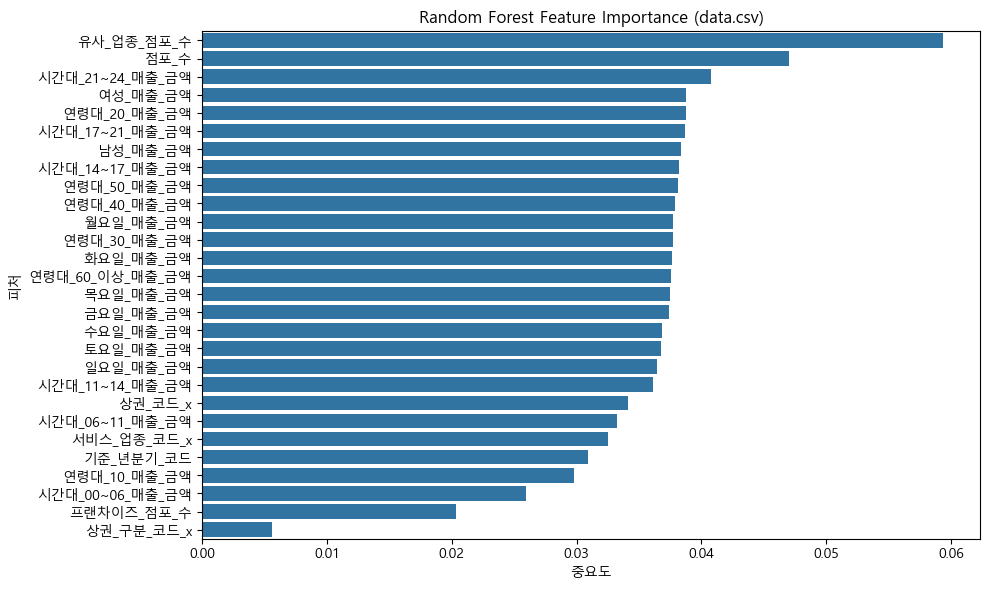

In [190]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

importances = model1.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Random Forest Feature Importance (data.csv)")
plt.xlabel("중요도")
plt.ylabel("피처")
plt.tight_layout()
plt.show()

In [191]:
X_train.shape

(420426, 28)

In [192]:
import lightgbm as lgb

model2 = lgb.LGBMClassifier(
    objective='binary',        
    n_estimators=1000,          
    learning_rate=0.05,
    max_depth=-1,               
    num_leaves=31,              
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)
model2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 84941, number of negative: 335485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6297
[LightGBM] [Info] Number of data points in the train set: 420426, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202036 -> initscore=-1.373620
[LightGBM] [Info] Start training from score -1.373620


LGBMClassifier(learning_rate=0.05, n_estimators=1000, n_jobs=-1,
               objective='binary', random_state=42)

In [193]:
y_pred = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8074445489049061
Recall: 0.19050298188365028
F1 Score: 0.2898724424278743


In [194]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',   # or 'multi:softprob' for multi-class
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

num_boost_round = 300

model3 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round
)

In [195]:
y_pred_prob = model3.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.8078972109056722
Recall: 0.18887138516934848
F1 Score: 0.28858800773694393


In [ ]:
df1_2019 = pd.read_csv(expected_sales[0])
df1_2020 = pd.read_csv(i) for i in the_number_of_shops)
df1.shape, df2.shape